In [112]:
import pandas as pd
import random
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


### ###################################
###               Reading Data:                       ####
### ##################################

In [113]:
'Data Reading'
# Simple data handling -most this will already be processed by group 2.
# read data into dataframe
#df= pd.read_excel('irisexcel.xlsx')
df=pd.read_excel('C:/Users/qlyon/Documents/GitHub/oopproject/group_3/Real estate valuation data set.xlsx')
# view inital data head
#print(df.head())

# View the column names
#print(df.columns)
col_names = df.columns

# Create the x-data frame (remove the y value that describes the flower) 
#dfx= df.drop(labels = df.columns[len(df.columns)-1], axis=1, inplace=False) # implace = true - does not create a new table
#dfx= df[col_names[2:4]]
dfx=df.drop(columns=['Y house price of unit area', 'No','X1 transaction date',])
print(dfx)
# create the y data frame of results



#print(col_names)
dfy= df[col_names[len(col_names)-1]]
#print(dfy)
#print(len(df))
#print(type(dfy)) #<class 'pandas.core.series.Series'>

     X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  X5 latitude  X6 longitude  
0                                 10     24.98298     121.54024  
1                                  9     24.98034     121.53951  
2                                  5     24.98746     121.54391  
3  

In [114]:
class dataSplit_test_train():
    '''Method split data 
    Using sklearn.ensemble package

    X_train, y_train will be the training data (A split_size (%) of original data taken from the X_data and Y_data        X_test, y_test is the remaining data that has not been processed.
    test_size is the amout of data used as training and testing.
    random_state is an integer which defines if the training and split data is recalled  

    Possible to implement own function here, however; to produce a shuffle of the dataframe or
    randomly selecting the number of rows for train/ test, additional functions such as sklearn shuffle or permutation
    are used. The expense of calling these as compared to train_test_split from sklearn is not justified.
    '''
    def __init__(self, X_data, Y_data, split_size, random_state):  
        
        self.X_data = X_data
        self.Y_data = Y_data
        self.split_size = split_size
        self.random_state = random_state
        
    def __del__(self):
        print("Split data has been deleted")    
        
    def split_data(self):
    
        # X_train, X_test, y_train, y_test
        data= train_test_split(self.X_data, self.Y_data, test_size= self.split_size, random_state= self.random_state)

        return data #X_train, X_test, y_train, y_test

In [115]:
# these parameters will be set by the GUI and updates these accordingly.
split_size = 0.2
r_state = 10
### ###################################
### The following is the ai model class: ####
### ##################################
rawData = dataSplit_test_train(dfx, dfy, split_size, r_state)
#print(type(rawData))
splitData= rawData.split_data()
print(splitData)


Split data has been deleted
[     X2 house age  X3 distance to the nearest MRT station  \
52           32.1                               1438.5790   
101          12.7                                170.1289   
389          40.9                                122.3619   
386           0.0                                185.4296   
64           17.5                                995.7554   
..            ...                                     ...   
369          20.2                               2185.1280   
320          13.5                               4197.3490   
15           35.7                                579.2083   
125           1.1                                193.5845   
265          15.7                                815.9314   

     X4 number of convenience stores  X5 latitude  X6 longitude  
52                                 3     24.97419     121.51750  
101                                1     24.97371     121.52984  
389                                8    

### ###################################
### The following is the ai model class: ####
### ##################################

In [374]:
#The following represents a class of RandomForrect implementation
# 
''' This class defines the blue print of AI method - Random Forrest'''

class artificial_2():
    '''Documentation for Class artificial
    The class can handle multiple AI methods

    More Details
    '''
    def __init__(self, X_train, X_test, y_train, y_test):
        
        '''The constructor
        Initialise Model data
        '''
        self.__X_train= X_train       
        self.__X_test= X_test
        self.__y_train= y_train
        self.__y_test= y_test
        self.__classifier= None
        self.__predictionValues= None
        self.importances= list()
    
    def __del__(self):
        print("AI Model has been deleted")
        
        #setter methods
    def set_classifier(self, n_est, crit, mdepth, msamples, msleaf, mfeatures, r_state):
        '''
        Sets the classifier to the type of forrest classifier
        
        More Details
        Regressor 
        Classifier
        '''
                                             
        self.__classifier= RandomForestRegressor(n_estimators= n_est, max_depth= mdepth, min_samples_split= msamples, 
                                                 min_samples_leaf= msleaf, max_features= mfeatures, random_state= r_state)
        
        try:
            self.__classifier.fit(X= self.__X_train, y= self.__y_train, sample_weight= None)
        except:
            if (self.__classifier == NULL):
                 return 10100 # "Classifier is null - Set classifier first" 
            else:
                 return 10101  # "Error with model fit - Regressor requires numeric Data" 
        
        self.importances= self.__classifier.feature_importances_
        
        return 0
    
    # Get methods
    def get_X_train(self):
        return self.__X_train
    def get_y_train(self):
        return self.__y_train    
    def get_X_test(self):
        return self.__X_test
    def get_y_test(self): 
        return self.__y_test
    def get_predictionValues(self): 
        return self.__predictionValues
    
    # Get methods
    def get_classifier(self):
        '''
        Get classifier type
        More Details
        '''                 
        return self.__classifier
    
    def get_prediction(self, Xdata):
        '''
        classifier.predict(x_test)
        More Details
        ''' 
        # tests if user is using new xdata and wants to confirm model fit without re-training
        if not isinstance(Xdata, pd.DataFrame): Xdata = self.__X_test
        self.__predictionValues= self.__classifier.predict(Xdata)
        
        return self.__predictionValues
    
    def get_modelParams(self):
        '''
        Get model Parameters
        More Details
        '''        
        return self.__classifier.get_params(deep=True)
    
    
    def get_trainScore(self):
        '''
        Gets the testing Score of the Classifier 
        More Details
        '''        
        return self.__classifier.score(X= self.__X_train, y= self.__y_train) 
    
    
    def get_test_error(self):
        '''
        Gets the testing Score of the Classifier
        1: mse error
        2: mae error
        3: R2 score
        More Details
        '''        
        
        mse= mean_squared_error(self.__y_test, aiModel.get_prediction(None)) 
        mae= mean_absolute_error(self.__y_test, aiModel.get_prediction(None))
        r2= r2_score(self.__y_test, aiModel.get_prediction(None))
        
        return mse, mae, r2 
    
    
    
    def get_treeGraph(self):
        '''
        Gets the tree Model plots
        More Details
        ''' 
        # Cycle through the trees and build model
        # Reference: https://mljar.com/blog/visualize-tree-from-random-forest/
        tree_index = 0
        for tree_in_forrest in aiModel.get_classifier().estimators_:
            file_name = 'tree_'+ str(tree_index) + '.png'
            plt.figure(figsize=(20,20))
            fig = tree.plot_tree(tree_in_forrest, feature_names=self.get_X_train().columns, filled=True)
            plt.savefig(file_name)
            tree_index += 1
        return 0
        
    def get_visualPlot(self):
        
        # Plot of the test and predicted overlay
        file_name = 'RFR_Plot_Overlay.png'
        plt.figure(figsize=(15,15))
        fig= plt.plot(np.array(self.get_y_test()), label="y test")
        fig= plt.plot(self.get_prediction(None), label="y predicted")
        plt.legend()
        plt.xlabel('Test Index', fontsize= 16)
        plt.ylabel(aiModel.get_y_test().name, fontsize=16)
        plt.title('Plot Overlay', fontsize=20)
        plt.savefig(file_name)
        
        # New plot of the Features of importance
        file_name = 'FeatureOfImportances.png'
        fig = plt.figure(figsize=(15,15))
        ax = fig.add_axes([0,0,1,1])
        width= 0.2
        importances= aiModel.importances
        xValues= list(range(len(importances)))
        ax.bar(xValues, importances, width, color= 'r')

        plt.xticks(xValues, aiModel.get_X_test().columns)
        ax.set_xlabel('Features', fontsize= 16)
        ax.set_ylabel(aiModel.get_y_test().name, fontsize=16)
        ax.set_title('Features Of Importance', fontsize=20)
        plt.savefig(file_name)
        
        return 

In [375]:
# Object creation 
# splitData is a list of 4 - X_train, X_test, y_train, y_test
aiModel= artificial_2(splitData[0], splitData[1], splitData[2], splitData[3])


In [376]:
# Set Classifer of RandomForestClassifier

n_estimators= 10 # Number of trees in forrest. INT Range: 2 to ~
criterion= "mse" # "mae" Or "mse" 
max_depth= 4 # Max tree depth default= None, INT Range: 1 to ~ 7 (any higher and tree visualisation will be difficult)
random_state= 10  # RNG INT Range: Any.
max_features= "auto" # "sqrt", "log2", None, or INT: Range 1 to ~ say 100 features at each split
min_samples_split= 2 # Default = 2, INT Range: 2 to ~ 
min_samples_leaf= 2 # Default 1, INT Range: 1 to ~
# Note- Regressor models requires numeric data, thus not able to use with Iris data.
aiModel.set_classifier(n_estimators, criterion, max_depth, min_samples_split, min_samples_leaf, max_features, random_state) 

0

In [377]:
# Just info about the model
print(aiModel.get_classifier())
print(aiModel.get_modelParams())
print(aiModel.get_modelParams().get('n_estimators'))  # dictionary key access -testing purposes only

RandomForestRegressor(max_depth=4, min_samples_leaf=2, n_estimators=10,
                      random_state=10)
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10, 'n_jobs': None, 'oob_score': False, 'random_state': 10, 'verbose': 0, 'warm_start': False}
10


In [378]:
# Returns the x test data
print(aiModel.get_X_test())
# Returns the y test predictions Notw: None can be replaced with a pd.Dataframe
aiModel.get_prediction(None)

     X2 house age  X3 distance to the nearest MRT station  \
231          16.2                              4074.73600   
322          12.9                               187.48230   
1            19.5                               306.59470   
72           32.5                               424.54420   
291           3.4                                56.47425   
..            ...                                     ...   
194          15.2                              3771.89500   
131           4.0                              2147.37600   
317          15.6                               752.76690   
355           3.8                               383.86240   
114          30.6                               143.83830   

     X4 number of convenience stores  X5 latitude  X6 longitude  
231                                0     24.94235     121.50357  
322                                1     24.97388     121.52981  
1                                  9     24.98034     121.53951  
72 

array([16.41580704, 40.38885498, 44.79140818, 39.3184362 , 51.15116846,
       16.41580704, 48.04210639, 54.22229931, 39.96124003, 26.10138107,
       28.43382692, 27.88426648, 43.67720966, 39.23784996, 15.95085574,
       46.51587805, 23.75221529, 48.04210639, 27.88426648, 55.08509069,
       46.51587805, 33.05742792, 25.50406232, 39.3184362 , 27.88426648,
       49.26610577, 48.04210639, 28.43382692, 16.41580704, 42.238543  ,
       20.19664548, 39.00433384, 30.85861287, 47.87842327, 33.05742792,
       48.04210639, 39.3184362 , 38.28094377, 46.51587805, 54.22229931,
       48.04210639, 39.3184362 , 25.50406232, 52.68455458, 39.00433384,
       36.2646422 , 39.3184362 , 56.06218903, 55.08509069, 39.3184362 ,
       39.3184362 , 48.04210639, 37.30458165, 51.15116846, 26.10138107,
       25.50406232, 23.5039923 , 48.04210639, 50.88047455, 33.05742792,
       38.28094377, 44.38064241, 46.51587805, 55.72771669, 28.43382692,
       43.89367247, 39.3184362 , 39.4704067 , 38.28094377, 55.92

In [379]:
print(aiModel.get_test_error())
# returns mse, mae, r2


(42.95467616188076, 4.7277798306993954, 0.7491773792312071)


In [380]:
# Returns the training Score
aiModel.get_trainScore()

0.7827681991638752

0

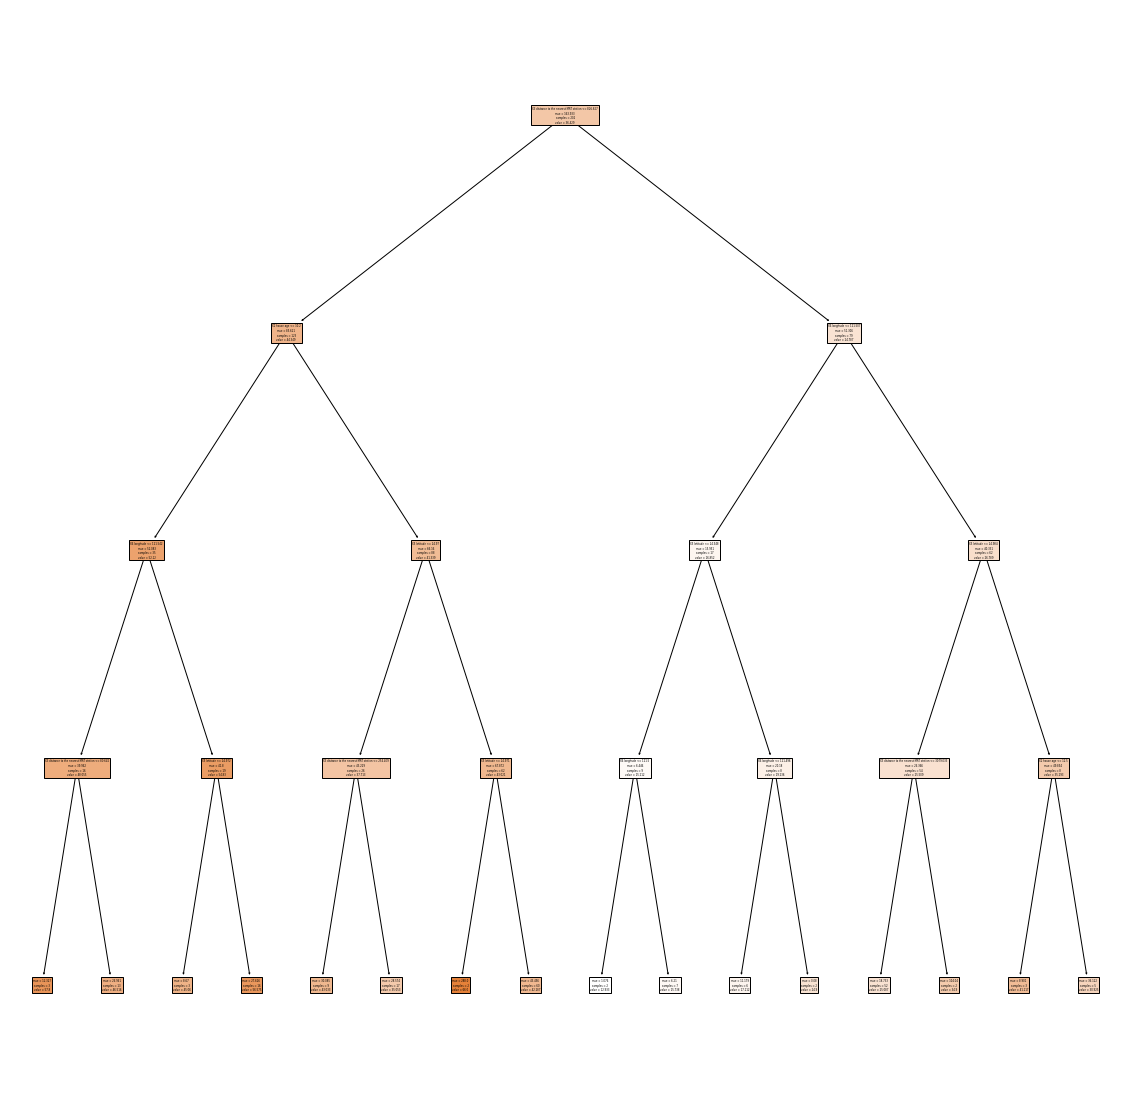

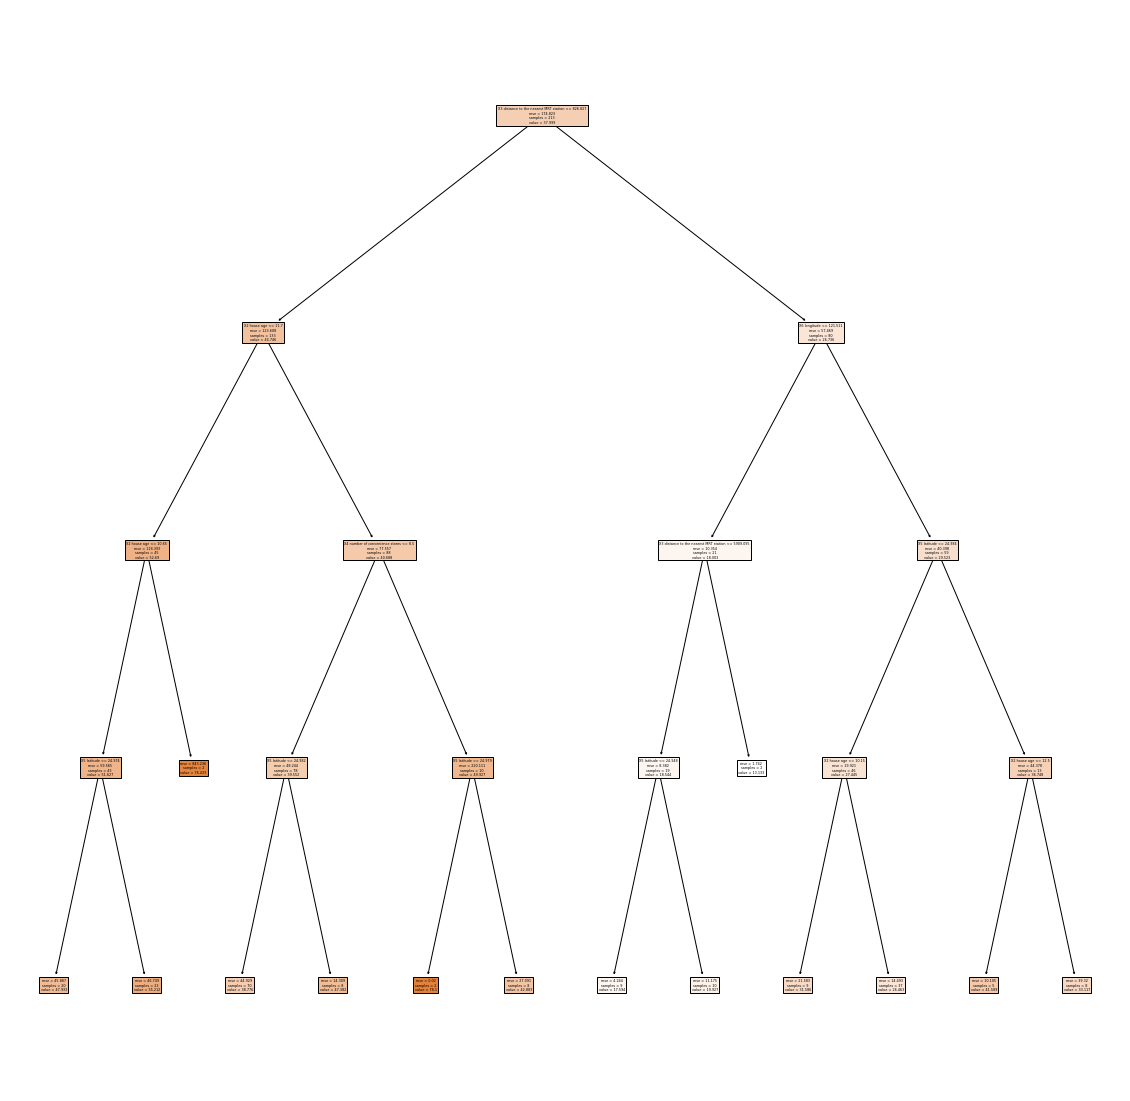

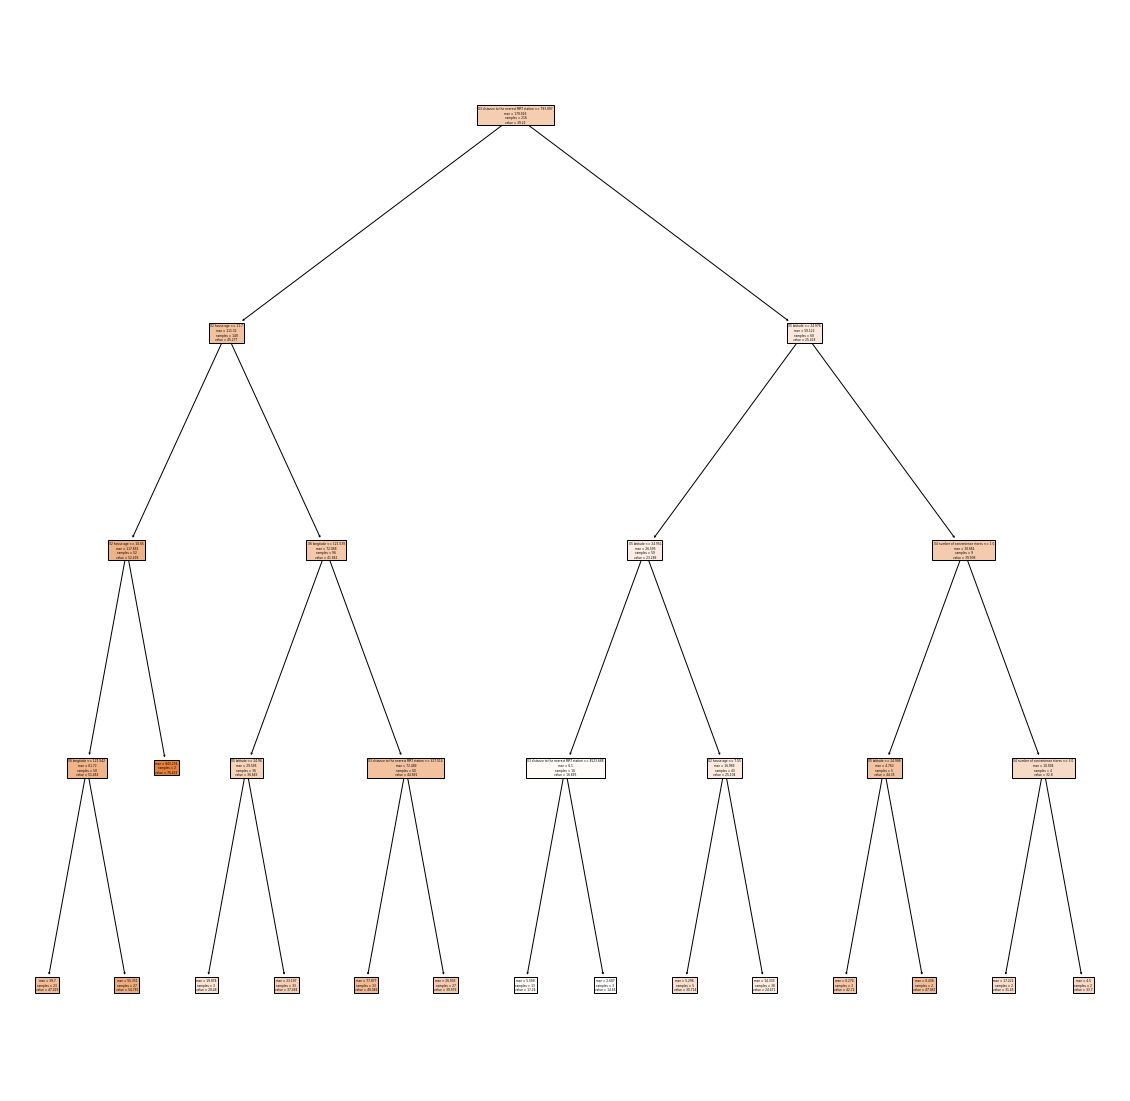

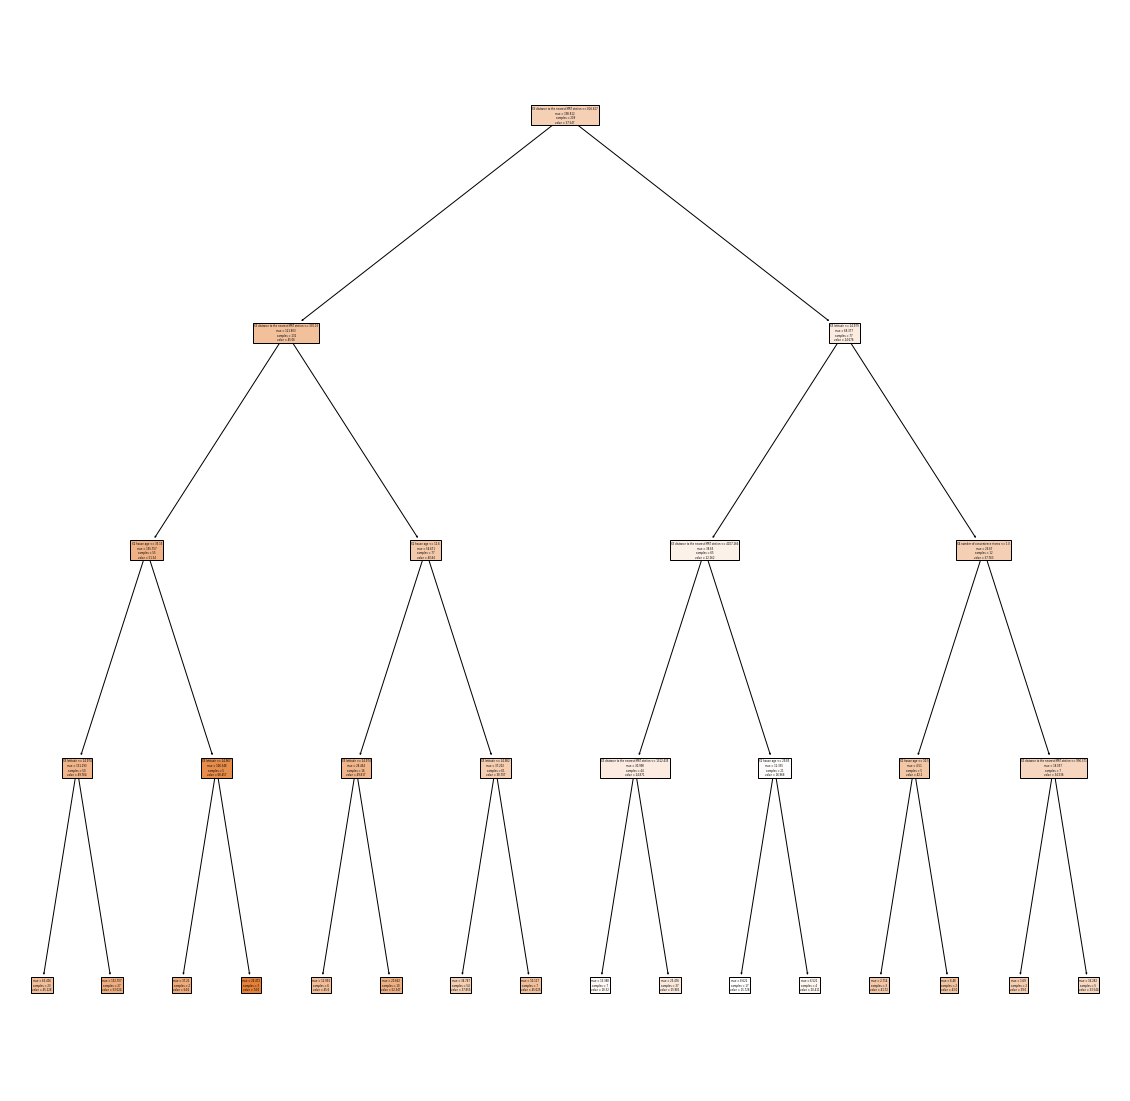

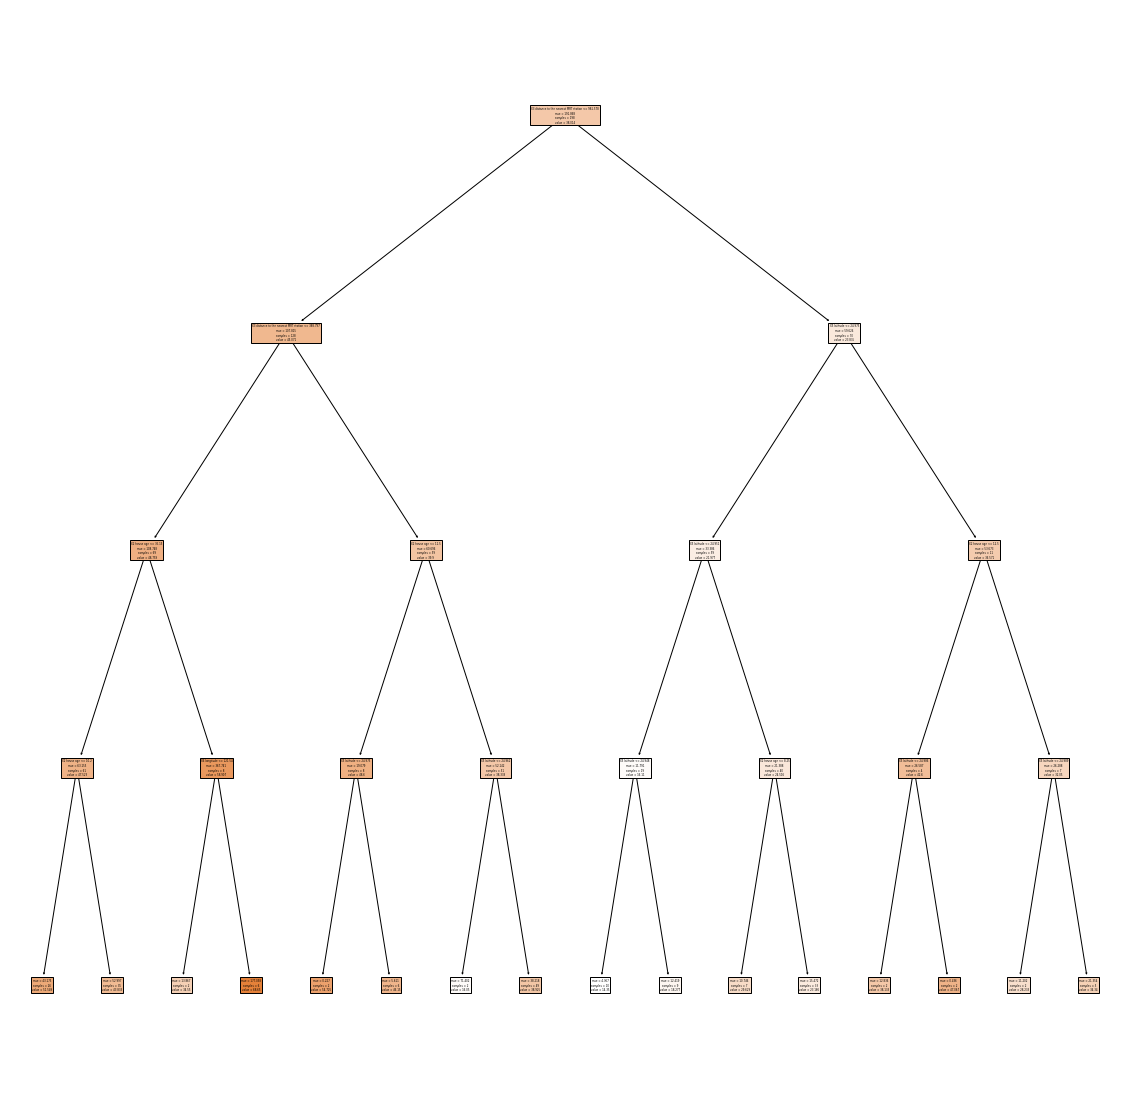

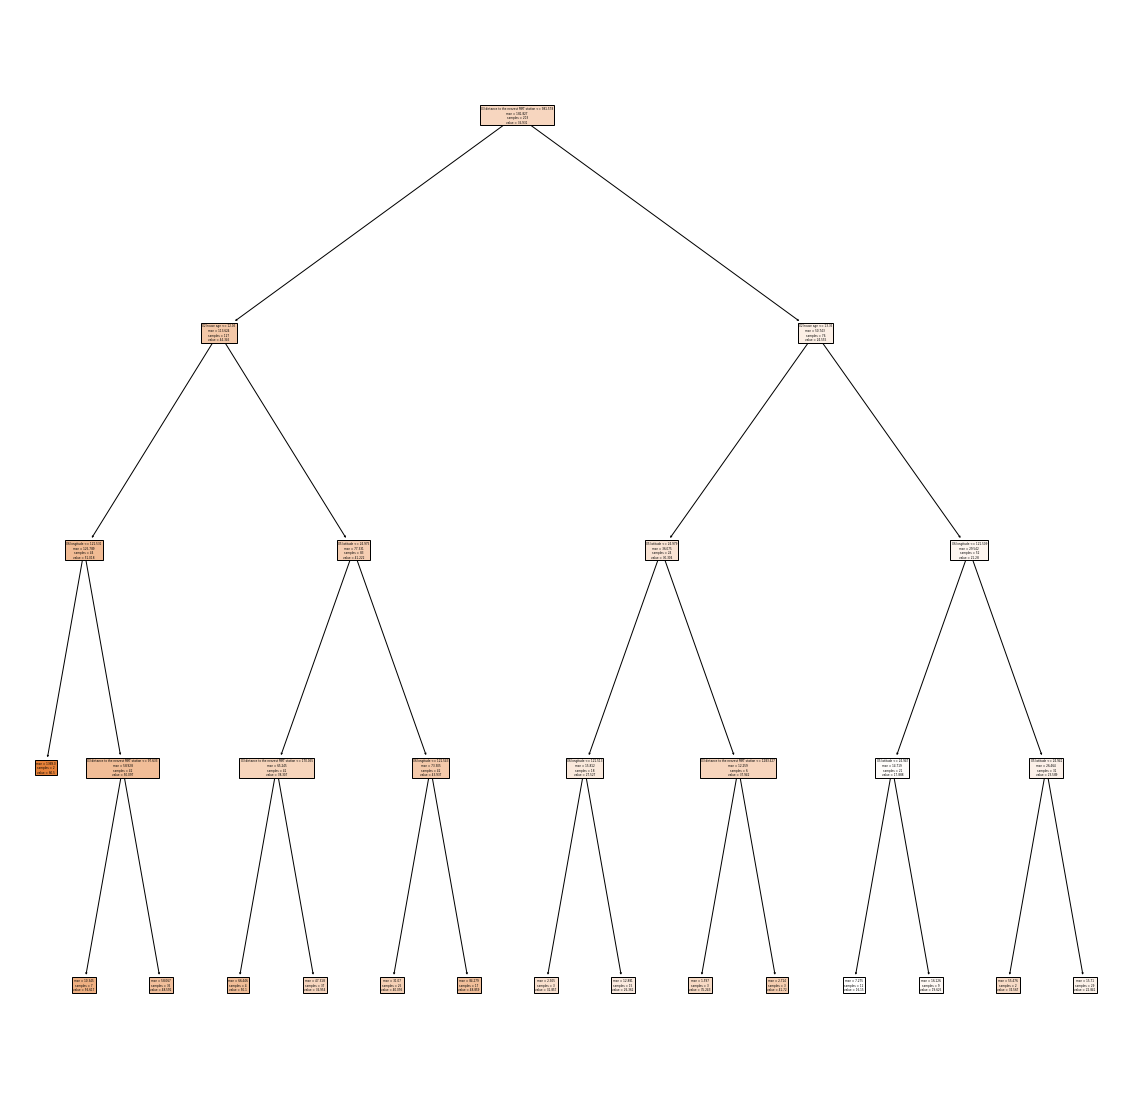

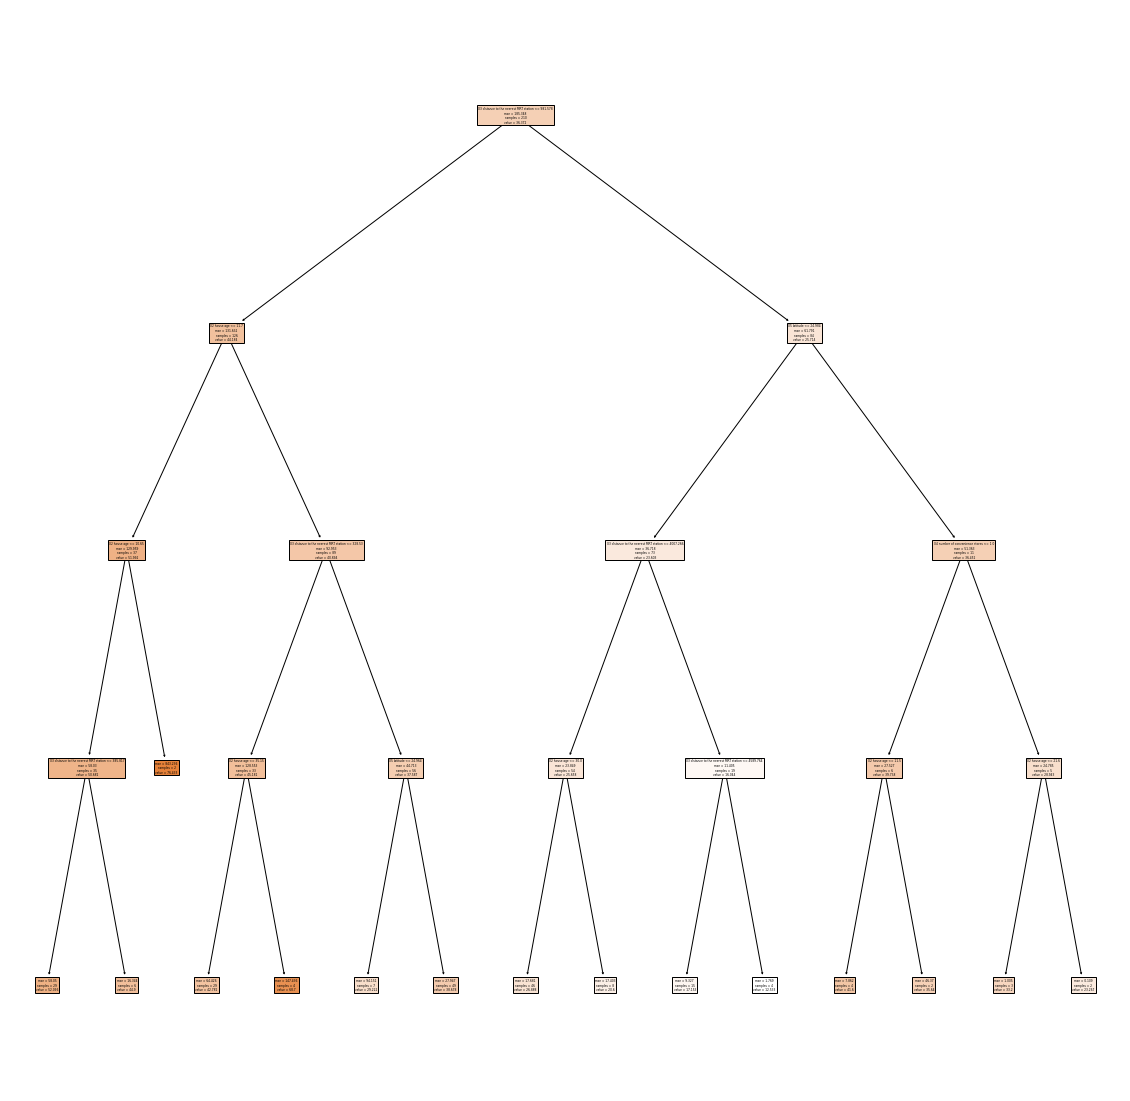

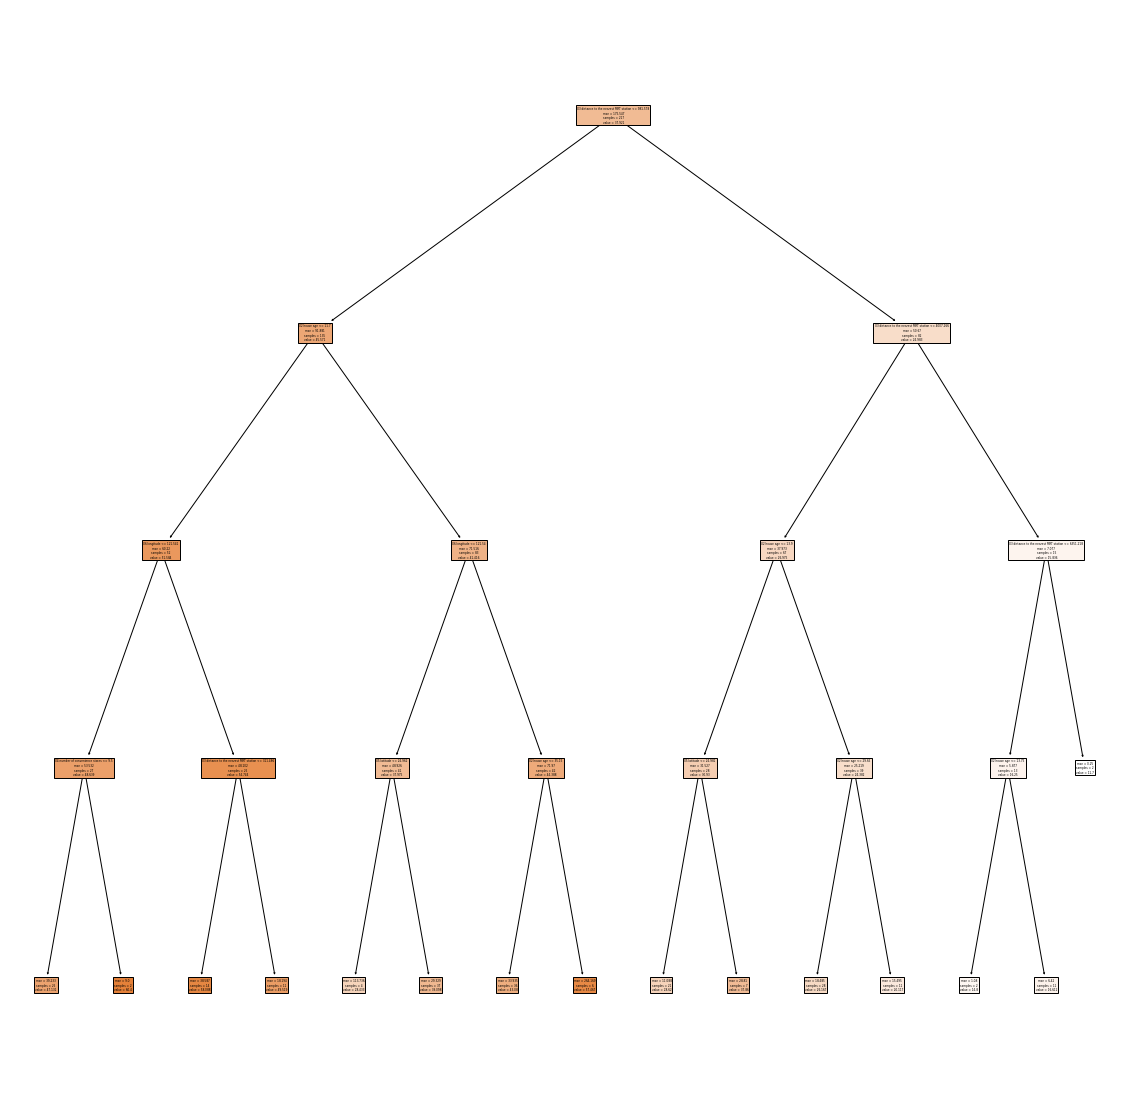

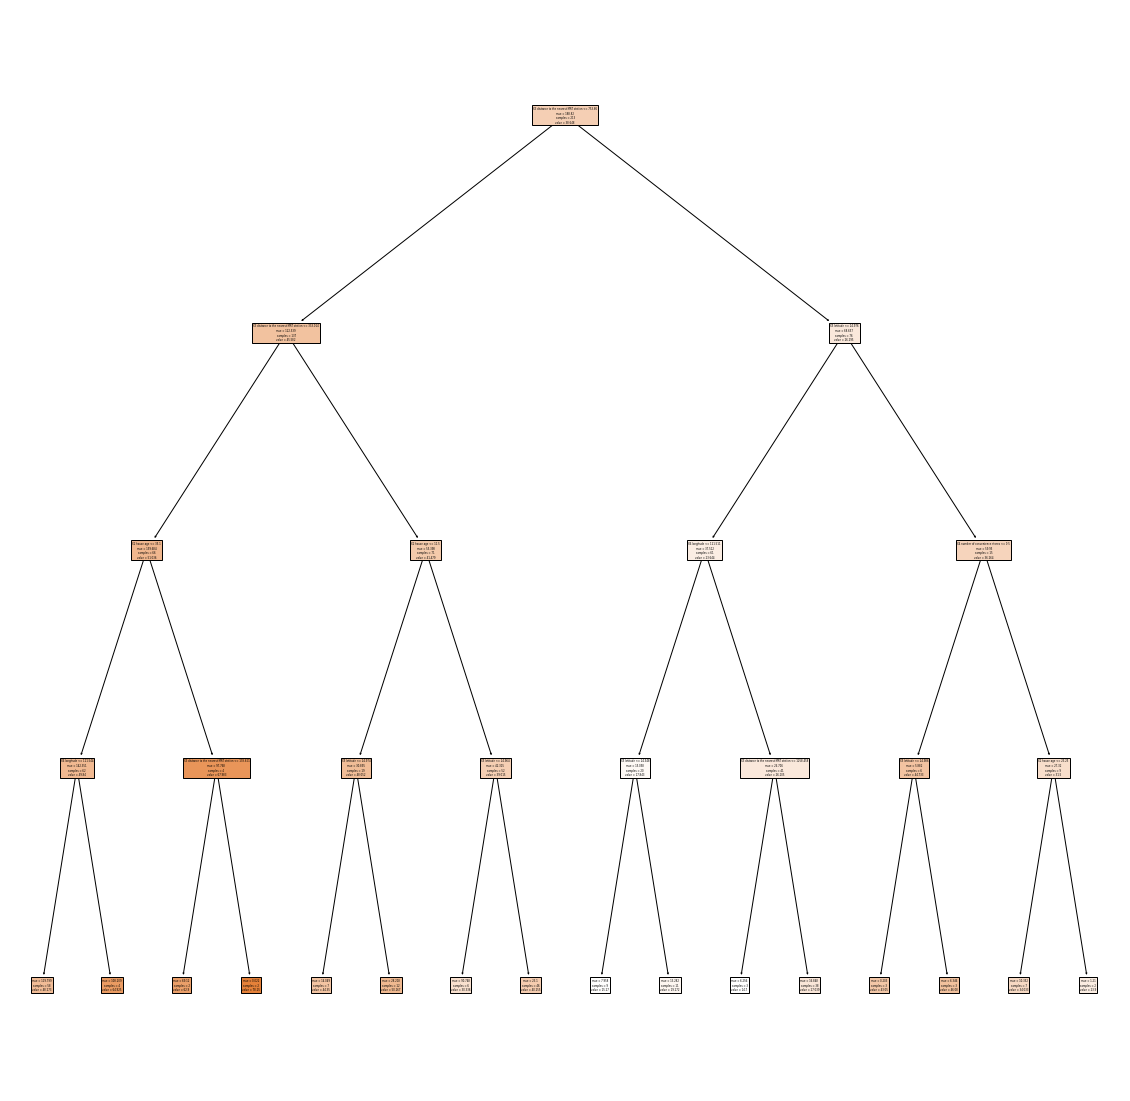

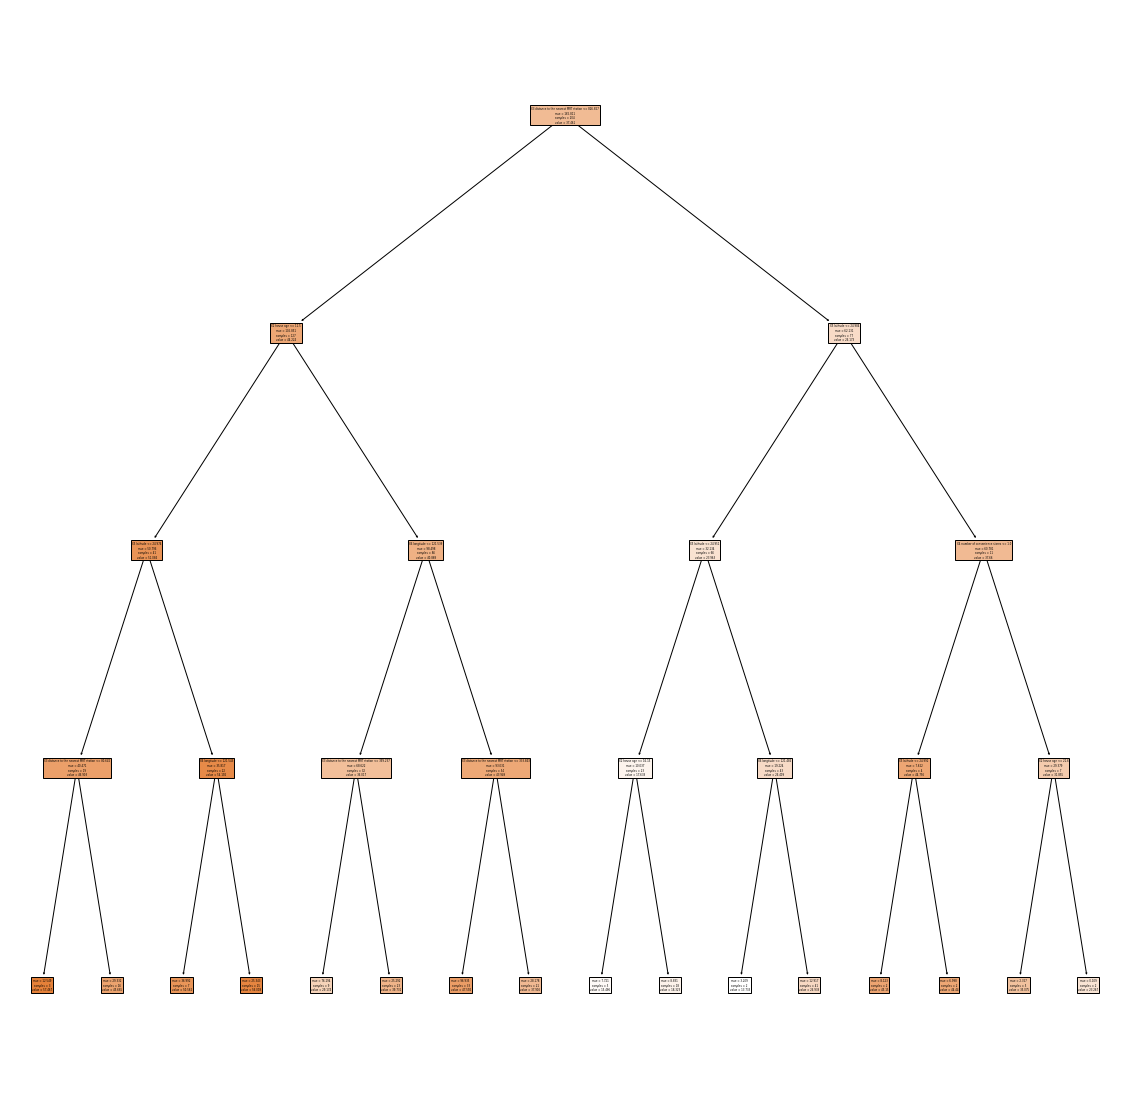

In [381]:
# Get model graphs for each tree
# A lower depth produces more visible trees
aiModel.get_treeGraph() 

#### 

AI Model has been deleted


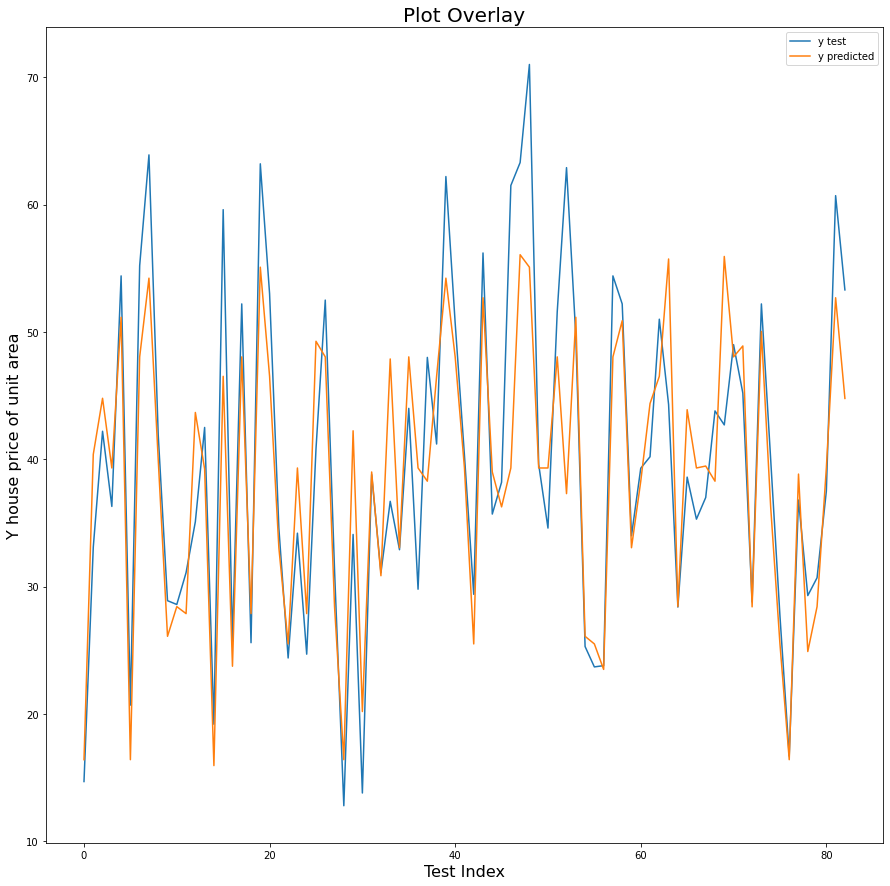

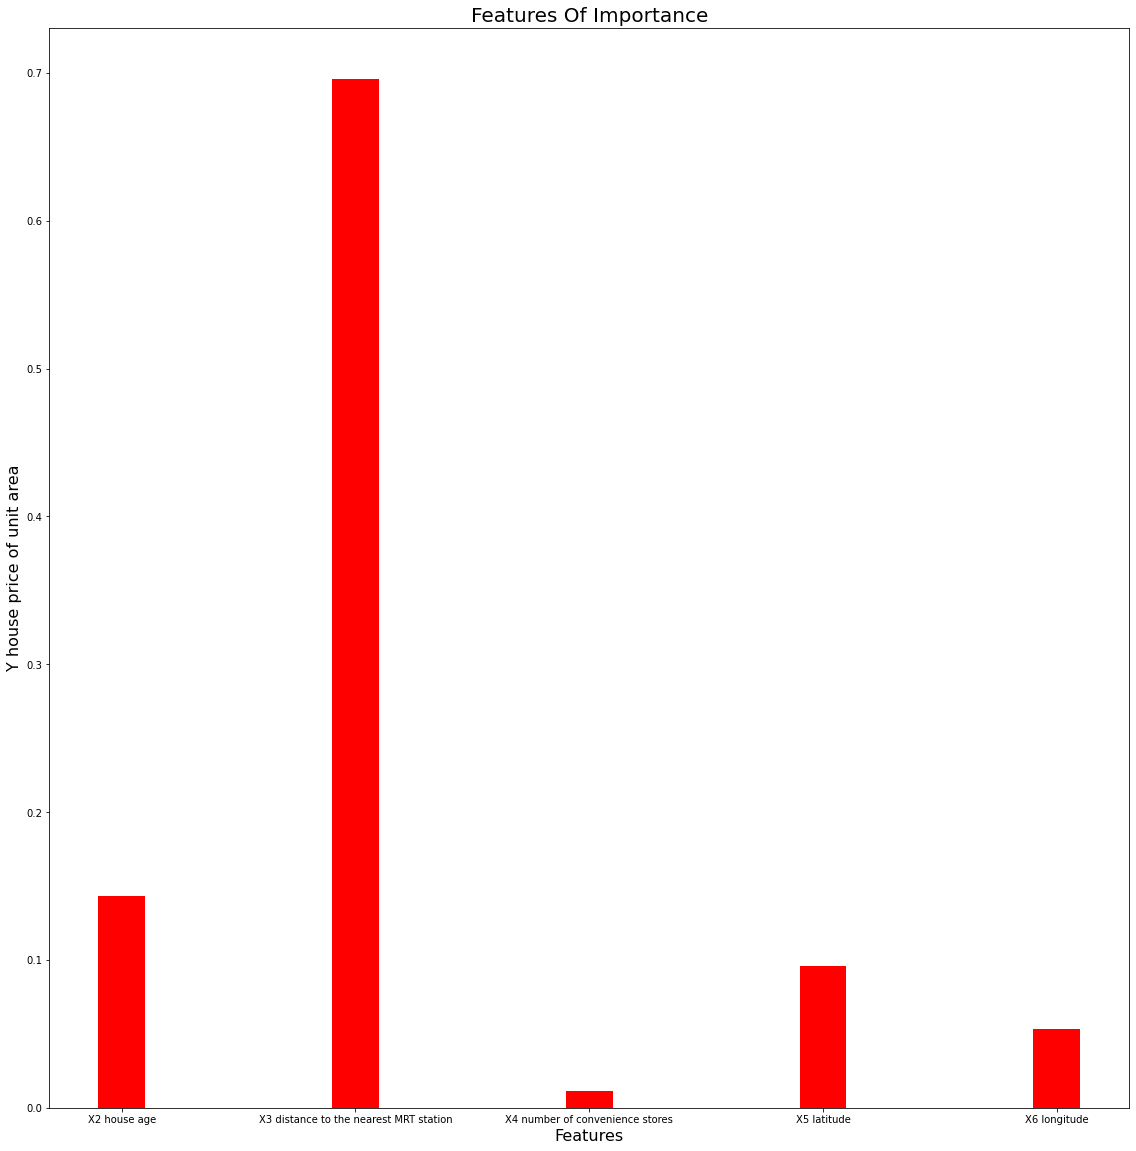

In [382]:
aiModel.get_visualPlot()

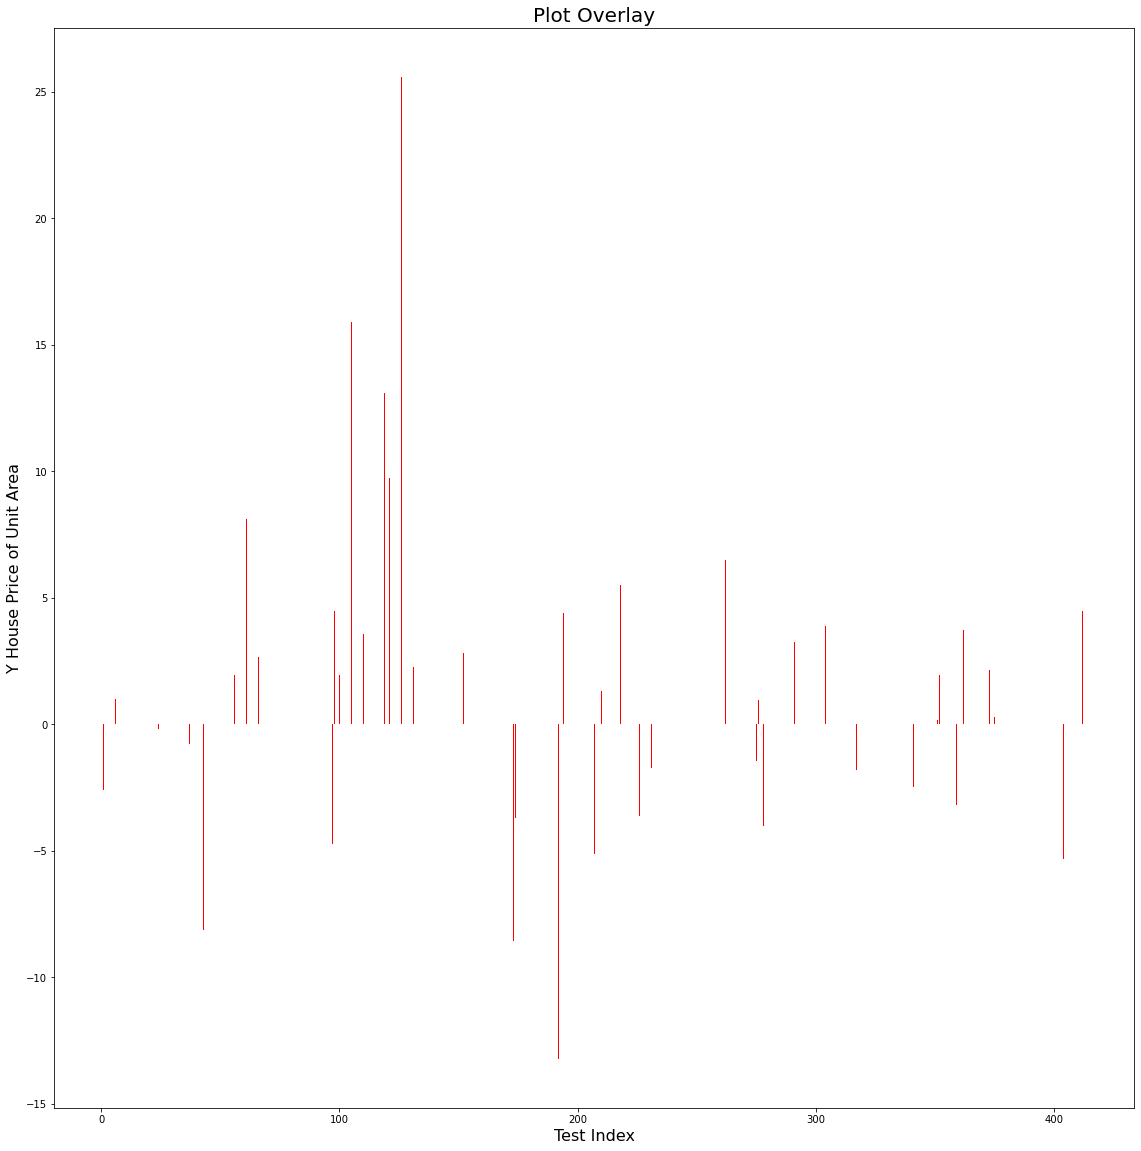

In [353]:
file_name = 'RFR_Plot_Overlay.png'
fig = plt.figure(figsize=(15,15))
ax = fig.add_axes([0,0,1,1])
width= 0.2
ax.bar(aiModel.get_X_test().index, np.array(aiModel.get_y_test())- aiModel.get_prediction(None), width, color= 'r')

ax.set_xlabel('Test Index', fontsize= 16)
ax.set_ylabel('Y House Price of Unit Area', fontsize=16)
ax.set_title('Plot Overlay', fontsize=20)
plt.savefig(file_name)

In [246]:
print(aiModel.get_X_test().index)

Int64Index([231, 322,   1,  72, 291, 154, 164, 413,  56, 152, 351, 279, 173,
            293, 329, 119, 352, 146, 282,  61, 262, 195, 261, 207, 359, 245,
            412, 353, 226,  43, 251,  24, 212, 327, 287, 278,  78, 121, 404,
             99,  66,   6, 304,  26, 301, 100,  47, 361, 105, 161,  97, 110,
            126, 275,  37, 266, 375, 102, 210, 276,  12, 227,  98,  65, 109,
            390, 392, 341, 218, 192, 225, 174, 259, 373, 362, 277, 298,  81,
            194, 131, 317, 355, 114],
           dtype='int64')


Text(0.5, 1.0, 'Plot Overlay')

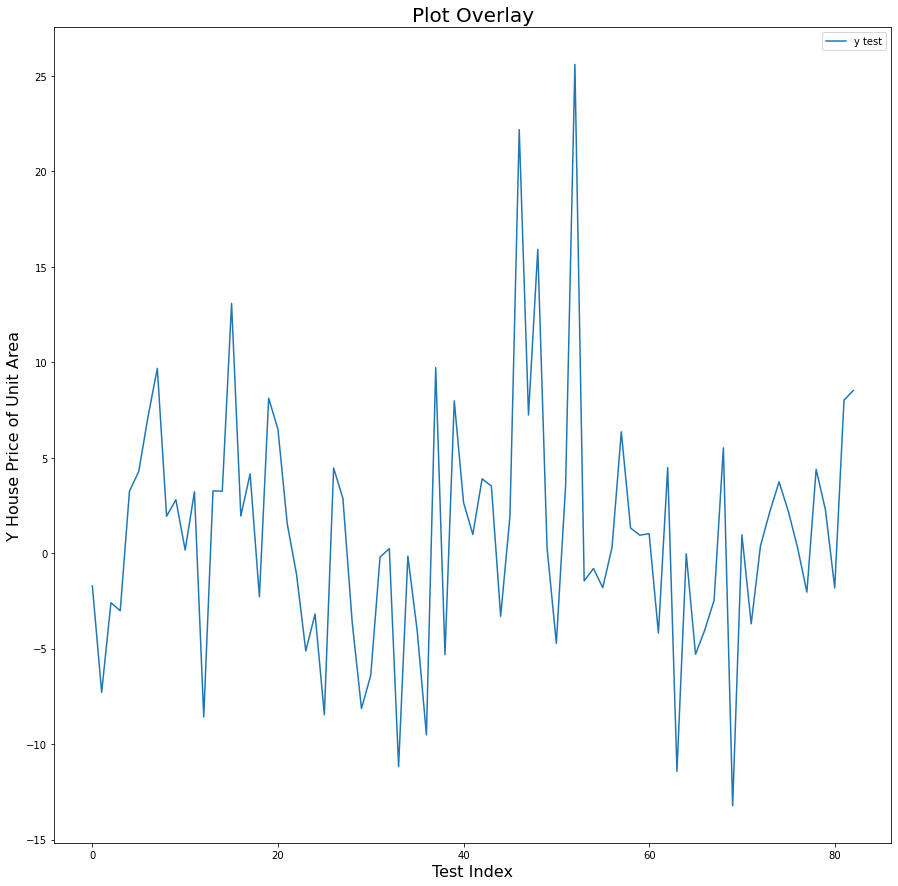

In [247]:
plt.figure(figsize=(15,15))
fig= plt.plot(np.array(aiModel.get_y_test())-aiModel.get_prediction(None), label="y test")
#fig= plt.plot(self.get_prediction(None), label="y predicted")
plt.legend()
plt.xlabel('Test Index', fontsize= 16)
plt.ylabel('Y House Price of Unit Area', fontsize=16)
plt.title('Plot Overlay', fontsize=20)